In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color

In [ ]:
df = pd.read_csv('cuentas_credicel.csv', encoding='latin')

df.head(5)

In [ ]:
df.info()

**Limpiar columnas**

In [18]:
# Eliminar el signo "S" de una columna "Plazo"
df['plazo'] = df['plazo'].str.replace('S', '')
df['plazo'] = df['plazo'].astype(int)

# Sustituirlos strings Atraso, Cancelado y Fraude por la constante "0"
df['riesgo']=df['riesgo'].str.replace('Atraso', '0')
df['riesgo']=df['riesgo'].str.replace('Cancelado', '0')
df['riesgo']=df['riesgo'].str.replace('Fraude', '0')
df["riesgo"]= df["riesgo"].fillna(0)

#Conversión de tipo de dato de columna de tipo Object a int
df['costo_total']= df['costo_total'].astype(float)

#Sustituyo valores nulos por "0"
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos
df["porc_enganche"]= df["porc_enganche"].fillna(0)

**Sacar Gráficas**

<Axes: xlabel='enganche', ylabel='riesgo'>

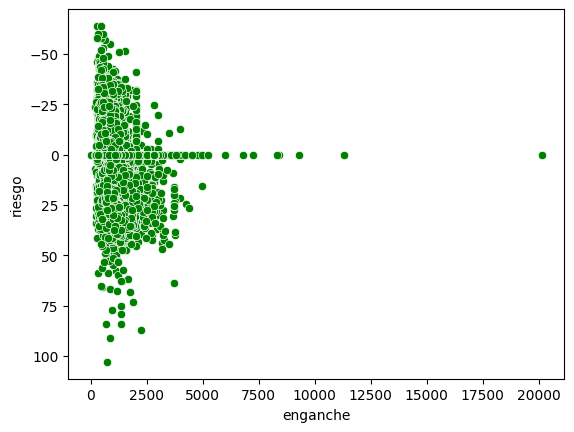

In [39]:
sns.scatterplot(x='enganche', y='riesgo', color="green", data=df)

<Axes: xlabel='precio', ylabel='plazo'>

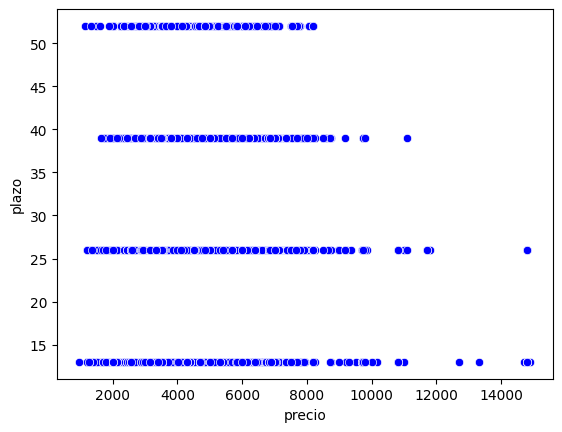

In [40]:
sns.scatterplot(x='precio', y='plazo', color="blue", data=df)

<Axes: xlabel='costo_total', ylabel='monto_financiado'>

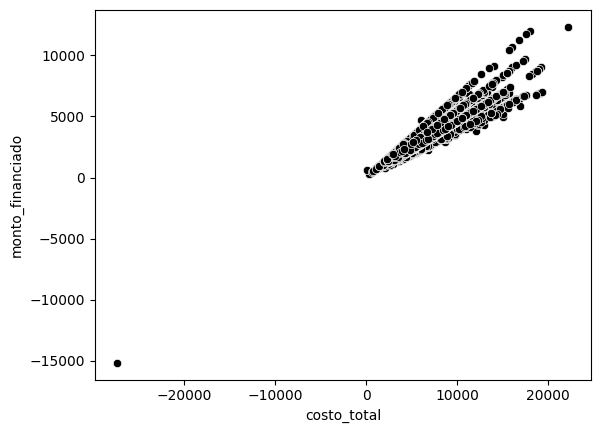

In [41]:
sns.scatterplot(x='costo_total', y='monto_financiado', color="black", data=df)

<Axes: xlabel='pagos_realizados', ylabel='porc_enganche'>

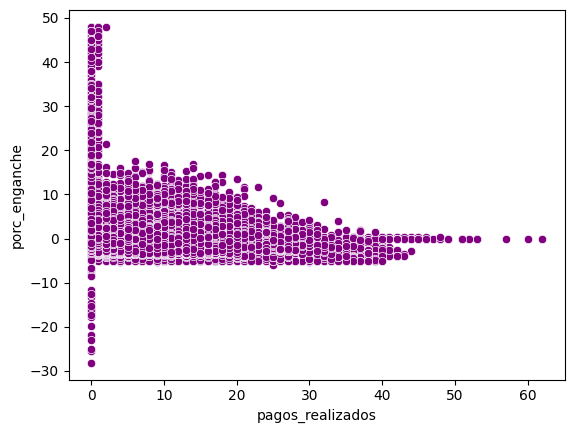

In [42]:
sns.scatterplot(x='pagos_realizados', y='porc_enganche', color="purple", data=df)

In [44]:
# Definir modelo de regresion lineal
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

#declarar variables dependientes e independientes para la regresión lineal

Modelo 1

In [ ]:
Vars_Indep1= df[["enganche"]]
Var_Dep1= df["riesgo"]
modelo.fit(X=Vars_Indep1, y=Var_Dep1)
modelo.__dict__

In [47]:
coeficiente_Deter1 = modelo.score(X = Vars_Indep1, y = Var_Dep1)
coeficiente_Deter1

0.042564202425108943

In [48]:
coeficiente_Correl1 = np.sqrt(coeficiente_Deter1)
coeficiente_Correl1

0.20631093627122374

Modelo 2

In [49]:
Vars_Indep2= df[["precio"]]
Var_Dep2= df["plazo"]
modelo.fit(X=Vars_Indep2, y=Var_Dep2)
modelo.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00150129]),
 'rank_': 1,
 'singular_': array([205285.3032759]),
 'intercept_': 19.90894959705299}

In [50]:
coeficiente_Deter2 = modelo.score(X = Vars_Indep2, y = Var_Dep2)
coeficiente_Deter2

0.041877006763330726

In [51]:
coeficiente_Correl2 = np.sqrt(coeficiente_Deter2)
coeficiente_Correl2

0.20463872254128915

Modelo 3

In [ ]:
Vars_Indep3= df[["costo_total"]]
Var_Dep3= df["monto_financiado"]
modelo.fit(X=Vars_Indep3, y=Var_Dep3)
modelo.__dict__

In [54]:
coeficiente_Deter3 = modelo.score(X = Vars_Indep3, y = Var_Dep3)
coeficiente_Deter3

0.8646380417764322

In [55]:
coeficiente_Correl3 = np.sqrt(coeficiente_Deter3)
coeficiente_Correl3

0.929859151579653

Modelo 4

In [ ]:
Vars_Indep4= df[["pagos_realizados"]]
Var_Dep4= df["porc_enganche"]
modelo.fit(X=Vars_Indep4, y=Var_Dep4)
modelo.__dict__

In [58]:
coeficiente_Deter4 = modelo.score(X = Vars_Indep4, y = Var_Dep4)
coeficiente_Deter4

0.06523723314088559

In [ ]:
coeficiente_Correl4 = np.sqrt(coeficiente_Deter4)
coeficiente_Correl4

- - -
**Los modelos son los siguientes:**

---
             
Matemático 1:* 0.00601946x - 3.422566722440304

Determinación 1:* 0.042564202425108943

Correlación 1:* 0.20631093627122374

---

Matemático 2: 0.00150129x + 19.90894959705299

Determinación 2:* 0.041877006763330726

Correlación 2:* 0.20463872254128915

---

Matemático 3: 0.42741682x + 639.9922581004103

Determinación 3:* 0.8646380417764322

Correlación 3:* 0.929859151579653

---

Matemático 4:* -0.15132576x + 2.3432248342563584

Determinación 4:* 0.06523723314088559

Correlación 4:* 0.25541580440702094